### Impute empty values to mean 

In [2]:
# Solution:

# In this dataset we have lots of observations that have missing values
# Missing values are represented using 0s
# We need to impute values with mean of every feature and substitute for missing values

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Diabetes Dataset

Input Features: 'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age'

Target Feature: 'diabetes_class'

Objective: Predict diabetes_class for given input features


In [6]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [7]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [9]:
# Find all the columns that have NA
df.isna().any(axis=0)

preg_count                     False
glucose_concentration          False
diastolic_bp                   False
triceps_skin_fold_thickness    False
two_hr_serum_insulin           False
bmi                            False
diabetes_pedi                  False
age                            False
diabetes_class                 False
dtype: bool

In [10]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
# finding columns with empty values 

columns_empty_values = []

for col in columns:
    #print(col)
    cnt = df[df[col]==0][col].count()
    if(cnt>0 and col!='diabetes_class'):
        columns_empty_values.append(col)
        print("{0}: {1}".format(col,cnt))

preg_count: 111
glucose_concentration: 5
diastolic_bp: 35
triceps_skin_fold_thickness: 227
two_hr_serum_insulin: 374
bmi: 11


In [41]:
# Columns those can be imputed with mean values

columns_empty_values

['preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi']

In [42]:
df

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


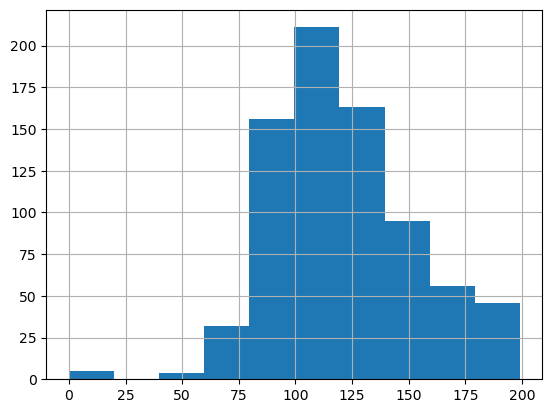

In [43]:
df['glucose_concentration'].hist()
plt.show()

In [45]:
# Find Summary statistics for each class
# impute values based on class
group_class = df.groupby('diabetes_class')

In [46]:
group_class.head(2)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
